# Finding the Age of the Universe using Supernova Data

#### This notebook uses redshift and maximum apparent magnitude measurementsof type IA Supernovae from the [Open Supernova Catalog](https://sne.space/) to estimate the Age of the Universe at 14.6 billion years (within 6% of the generally accepted value: [13.8 billion years](https://en.wikipedia.org/wiki/Age_of_the_universe)).  

![3D_view_type_Ia_supernovae.gif](./images/3D_view_type_Ia_supernovae.gif)

## Introduction

A [type IA Supernova](https://en.wikipedia.org/wiki/Type_Ia_supernova) is a type of supernova which results from the accretion of material by a white dwarf from its companion in binary systems. As the white dwarf gains mass, its temperature increases until it reaches a critical temperature at which runaway Carbon fusion starts. Type IA supernovae can be distinguished from other types of supernovae by looking at their lightcurve (i.e. apparent magnitude as a function of time).

Because their trigger mechanism always occur in the approximately same conditions, they all have a similar intensity. For this reason, they are known as [standard candles](https://en.wikipedia.org/wiki/Cosmic_distance_ladder#Standard_candles) and are very useful for measuring the distance to their host galaxy because their apparent magnitude as seen from earth is directly linked to their distance from us. 

Thanks to this property and their extreme luminousity, type IA supernovae can be used to determine the age of the universe by measuring their [apparent magnitude](https://en.wikipedia.org/wiki/Magnitude_%28astronomy%29#Apparent_magnitude) and [redshift](https://en.wikipedia.org/wiki/Redshift) (linked to their velocity away from us caused by the expension of the universe). 

## Description and Main Results

The data is obtained from [this Open Supernova Database link](https://api.sne.space/catalog?format=CSV).

The first step in this analysis is to convert redshift and apparent magnitude measurements into velocity and distance, respectively. Redshift measurements are converted into velocity using [the following special relativity formula](https://en.wikipedia.org/wiki/Redshift#Redshift_formulae): $1+ z = \sqrt{\frac{1+v/c}{1-v/c}}$, which can be rewritten as: $v = c  \frac{(1+z)^2 - 1}{(1+z)^2 + 1}$, where $z$ is the redshift, $v$ is the velocity of the redshifted object from the observer, and $c$ is the speed of light.

Maximum apparent magnitude measurements are converted into distance from the observer by applying the following definition: $m - M = 5 \log{\frac{d}{10}}$, or $d = 10^{\frac{5 + m - M}{5}}$, where $m$ and $M$ are the apparent and absolute maximum magnitude of the supernova, respectively, and $d$ is its distance in Parsec (pc).

The typical maximum absolute magnitude ($M$) of type IA supernovae can be known by estimating the distance of relatively close supernovae, which distance are known thanks to other standard candles (e.g. [Ceipheid variable stars](https://en.wikipedia.org/wiki/Cepheid_variable)). In practice, the average absolute magnitude of type IA supernovae from the Open Supernova Database is considered in this analysis (M = -18.9).

Above is a  3D plot of all type Ia supernovae in the Open Supernova Catalog, created with Plotly (a dynamic version of this 3D plot is available [here](./images/3D_view_type_Ia_supernovae.html)). It shows that the further a type Ia supernova is from the Milky Way, the more redshifted it tends to be (represented with the red color) . This 3D graph also shows that most distant type Ia supernovae are detected in very narrow beams. This is probably due to the fact that the search for distant supernovae is concentrated in very small regions of the sky (it would be impractical to monitor supernovae in every direction because the search for distant supernovae requires powerful telescopes over long periods of time). Furthermore, it clearly shows that few supernovae are detected in the galactic plane due to the [strong extinction caused by dust in the Milky Way](https://en.wikipedia.org/wiki/Zone_of_Avoidance). This 3D plot required the conversion of declination and right ascension from sexagesimal (i.e. hour:minute:second) to decimal, and then the conversion to carthesian coordinates using the following equations (where $d$ is the distance, $\theta$ is the declination, and $\phi$ is the right ascension): 
- $x = d \sin(\theta) \cos(\phi)$ 
- $y = d \sin(\theta) \sin(\phi)$ 
- $z = d \cos(\theta)$ 

In the graph below, the velocity infered from redshift is plotted as a function of the distance to the type Ia supernova

<p align="center"><img src="./images/redshift_velocity_vs_distance.png" width = "800"></p>

Then, the linear relationship between distance and velocity of type IA supernova is determined using a [random sample consensus (RANSAC)](https://en.wikipedia.org/wiki/Random_sample_consensus) algorithm in order to exclude clear outliers from the linear fit. This relationship which corresponds to the expansion rate of the universe per unit distance, is known as the [Hubble constant](https://en.wikipedia.org/wiki/Hubble's_law) ($H_0$) and is expressed in (km/s)/Mpc. This calculation resulted in an estimate for the Hubble constant of 66.8 (km/s)/MPc, which is very close to the commonly accepted value of this parameter (~70 (km/s)/MPc).

The [lookback time](https://arxiv.org/pdf/astro-ph/9905116.pdf) (i.e. the time since the light was emitted from a luminous object) as a function of redshift is expressed as follows:

<div align="center">$ t_L = \cfrac{1}{H_0} {\displaystyle\int_{0}^{z} \cfrac{dz'}{(1+z')\sqrt{\Omega_M(1+z')^3 + \Omega_k(1+z')^2 + \Omega_\Lambda}}}$</div>

, where $t_L$ is the lookback time for a redshift of $z$, $H_0$ is the Hubble constant, $\Omega_M$ is the mass density of the universe, $\Omega_\Lambda$ is the cosmological constant (term caused by the dark energy) and $\Omega_k$ is the curvature of space.

This equation can be simplified by assuming that the [universe is flat](https://en.wikipedia.org/wiki/Shape_of_the_universe) ($\Omega_k + \Omega_M + \Omega_\Lambda = 1$) and empty ($\Omega_M = \Omega_\Lambda = 0$), meaning that the universe has been expanding at the constant rate H0 since the Big Bang and that the observed redshift is not caused by the attraction between massive objects or by dark energy. The equation then becomes:

<div align="center">$ t_L = \cfrac{1}{H_0} {\displaystyle\int_{0}^{z} \cfrac{dz'}{(1+z')^2}} = \cfrac{1}{H_0} \left(1 -\cfrac{1}{1+z}\right)$</div>

By integrating the redshift over infinity, we obtain the Age of the Universe according to this simplified model:

<div align="center">$ t_0 = \cfrac{1}{H_0} {\displaystyle\int_{0}^{\infty} \cfrac{dz'}{(1+z')^2}} = \cfrac{1}{H_0}$ = 14.6 billion years</div>

This value is only 6% off the [commonly accepted value of 13.8 billion years](https://en.wikipedia.org/wiki/Age_of_the_universe#Planck) derived using the Lambda CDM model.

The graph below shows the lookback time of type Ia supernova (calculated using the above simplified equation for $t_L$ based and redshift measurements) as a function of the comoving distance (obtained using maximum apparent magnitude measurements). This graph also displays the lookback time vs distance, predicted by the empty universe model taking into account the following relationship between comoving distance and redshift:

<div align="center">$d_c = \cfrac{c}{H_0} {\displaystyle\int_{0}^{z} \cfrac{dz'}{(1+z')}} = \cfrac{c}{H_0} \ln(1+z)$</div> 

In this graph, when the redshift becomes infinitely large (i.e. for "light" emitted immediately after the Big Bang, when the Universe was infinitely small), the lookback time converges to the predicted age of the Universe (14.3 billion years).

<p align="center"><img src="./images/lookback_time_vs_distance.png" width = "800"></p>


This simplified model is surprisingly accurate to find the lookback time up to now and ultimately, the age of the universe, when compared to the generally accepted [Lambda CDM model](https://en.wikipedia.org/wiki/Lambda-CDM_model) ($\Omega_\Lambda = 0.73$, $\Omega_M = 0.27$ and $\Omega_k = 0$). This is due to the fact that, on average, phases of accelerating expension of the universe have been canceled out by the action of gravity between massive objects). However, the empty universe model is expected to diverge from the Lambda CDM model in the future as the universe becomes dominated by dark energy, causing it to [expand at an exponential rate](https://en.wikipedia.org/wiki/Accelerating_expansion_of_the_universe).



## Credits

- Open Supernova Catalog: https://sne.space/

- Distance measures in cosmology, David W. Hogg: https://arxiv.org/pdf/astro-ph/9905116.pdf

- Thank you to Zoni Nation who worked on a [similar project using Galaxy data](https://github.com/zonination/galaxies) for giving me the inspiration

In [28]:
import pandas as pd
import numpy as np
from scipy import constants
import math
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
%matplotlib inline

from sklearn.linear_model import RANSACRegressor

import plotly
import plotly.graph_objs as go

In [29]:
# Setting default style 
sns.set(font_scale=1.4)
sns.set_style("dark")

# Reverting to old color palette
pal = sns.color_palette("deep")
pal = pal.as_hex()
pal[1], pal[2], pal[3] = pal[2], pal[3], pal[1]
sns.set_palette(pal)

In [30]:
# Reading data from the Open Supernova Catalog (https://sne.space/)
SN_data = pd.read_csv("./data/Open_SN_catalog.csv", error_bad_lines = False)
SN_data.info()

b'Skipping line 18918: expected 29 fields, saw 30\nSkipping line 19571: expected 29 fields, saw 30\nSkipping line 19824: expected 29 fields, saw 30\nSkipping line 20873: expected 29 fields, saw 30\n'
b'Skipping line 38970: expected 29 fields, saw 89\nSkipping line 39008: expected 29 fields, saw 30\nSkipping line 39142: expected 29 fields, saw 30\nSkipping line 39714: expected 29 fields, saw 35\n'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50499 entries, 0 to 50498
Data columns (total 29 columns):
event             50499 non-null object
alias             50463 non-null object
catalog           49663 non-null object
claimedtype       26087 non-null object
dec               46697 non-null object
discoverdate      45241 non-null object
discoverer        32261 non-null object
download          1425 non-null object
ebv               45508 non-null object
host              19071 non-null object
hostdec           14581 non-null object
hostoffsetang     14876 non-null object
hostoffsetdist    9907 non-null float64
hostra            14581 non-null object
instruments       31400 non-null object
lumdist           20335 non-null float64
maxabsmag         15682 non-null float64
maxappmag         38095 non-null float64
maxdate           37994 non-null object
name              50466 non-null object
photolink         39612 non-null object
ra                46697 non-null object
radiolink

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning:

Columns (8,11,27) have mixed types. Specify dtype option on import or set low_memory=False.



In [31]:
# Taking the median of numerical features when several values are provided (several measurements)
numerical_features = ["ebv", "redshift", "velocity", "maxabsmag", "maxappmag"]

for feature in numerical_features:
    SN_data[feature] = SN_data[feature].astype(str)
    rows_to_corect = SN_data[SN_data[feature].str.contains(",").dropna()][feature]
    for index, row in rows_to_corect.iteritems():
        median_val = np.median([float(x) for x in row.split(",")])
        SN_data.loc[index, feature] = median_val
    SN_data[feature] = SN_data[feature].astype(float)

In [32]:
# Dividing dataset into type Ia and other supernovae
SN_data["claimedtype"] = SN_data["claimedtype"].astype(str)
SN_Ia_data = SN_data[SN_data["claimedtype"] == "Ia"]
SN_other_data = SN_data[SN_data["claimedtype"].str.contains("Ia") == False]

SN_Ia_data.is_copy = False
SN_other_data.is_copy = False

In [33]:
# Typical maximum absolute magnitude of a type IA supernova
avg_maxabsmag = SN_Ia_data["maxabsmag"].mean()
print("Average absolute magnitude of type Ia supernova:", round(avg_maxabsmag,1))

Average absolute magnitude of type Ia supernova: -18.9


In [34]:
# Converting maximum apparent magnitude into distance
SN_Ia_data.loc[:, "distance_maxappmag"] = 10 ** (1+(SN_Ia_data["maxappmag"] - avg_maxabsmag)/5)

In [35]:
# Converting redshift into velocity
SN_Ia_data.loc[:, "redshift_velocity"] = constants.speed_of_light * ((1+SN_Ia_data["redshift"])**2 - 1)/((1+SN_Ia_data["redshift"])**2 + 1)

In [36]:
# Converting polar coordinates into carthesian coordinates

def convert_declination(row):
    if type(row["dec"]) == str:
        declination = row["dec"].split(",")[0].split(":")
        if len(declination) == 3:
            declination = math.pi/2 + round(float(declination[0]) + (float(declination[1]) + float(declination[2])/60)/60,3)/360*2 * math.pi
        else:
            declination = math.pi/2 + round(float(declination[0]) + float(declination[1])/60,3)/360*2 * math.pi
    else:
        declination = np.NaN
    return declination

def convert_right_ascension(row):
    if type(row["ra"]) == str:
        right_ascension = row["ra"].split(",")[0].split(":")
        if len(right_ascension) == 3:
            right_ascension = round(float(right_ascension[0]) + (float(right_ascension[1]) + float(right_ascension[2])/60)/60,3)
            right_ascension = right_ascension / 24 * 2 * math.pi
    else:
        right_ascension = np.NaN
    return right_ascension

def convert_x_carth(row):
    if (not np.isnan(row["distance_maxappmag"])) & \
    (not np.isnan(row["declination"])) & \
    (not np.isnan(row["right_ascension"])):
        x = row["distance_maxappmag"]/10**6 * math.sin(row["declination"]) * math.cos(row["right_ascension"])
    else:
        x = np.NaN
    return x

def convert_y_carth(row):
    if (not np.isnan(row["distance_maxappmag"])) & \
    (not np.isnan(row["declination"])) & \
    (not np.isnan(row["right_ascension"])):
        y = row["distance_maxappmag"]/10**6 * math.sin(row["declination"]) * math.sin(row["right_ascension"])
    else:
        y = np.NaN
    return y

def convert_z_carth(row):
    if (not np.isnan(row["distance_maxappmag"])) & \
    (not np.isnan(row["declination"])) & \
    (not np.isnan(row["right_ascension"])):
        z = row["distance_maxappmag"]/10**6 * math.cos(row["declination"])
    else:
        z = np.NaN
    return z

# Converting declination and right ascension to float
SN_Ia_data["declination"] = SN_Ia_data.apply(convert_declination, axis = 1)   
SN_Ia_data["right_ascension"] = SN_Ia_data.apply(convert_right_ascension, axis = 1)

# Converting polar coordinates to carthesian coordinates
SN_Ia_data["x_carth"] = SN_Ia_data.apply(convert_x_carth, axis = 1)
SN_Ia_data["y_carth"] = SN_Ia_data.apply(convert_y_carth, axis = 1)
SN_Ia_data["z_carth"] = SN_Ia_data.apply(convert_z_carth, axis = 1)

In [59]:
# Defining hovertext for dynamic 3D plot
list_hoverinfo = []
for index, row in SN_Ia_data[SN_Ia_data["redshift"]>0].iterrows():
    list_hoverinfo.append("Distance: %.1f Mpc <br>Redshift: %.3f" % (row["distance_maxappmag"]/10**6, row["redshift"]))

# Plotting 3D position of type Ia supernovae (for SN with known redshift)
trace1 = go.Scatter3d(
    x=SN_Ia_data[SN_Ia_data["redshift"]>0]["x_carth"],
    y=SN_Ia_data[SN_Ia_data["redshift"]>0]["y_carth"],
    z=SN_Ia_data[SN_Ia_data["redshift"]>0]["z_carth"],
    mode='markers',
    marker=dict(
        size=2,
        color=-SN_Ia_data[SN_Ia_data["redshift"]>0]["redshift"],
        colorscale='YlOrRd',
        opacity=0.3
    ),
    name='Type Ia Supernova',
    text = list_hoverinfo,
    hoverinfo = "text",
)

# Plotting position of Milky Way
trace2 = go.Scatter3d(x=[0],y=[0],z=[0], name='Milky Way', mode = "markers", marker=dict(color=pal.as_hex()[0]))


data = [trace1, trace2]

# Removing axes
axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

# Defining default camera view
camera = dict(
    up=dict(x=0., y=0., z=1),
    center=dict(x=-0.13, y=-0.4, z=0.4),
    eye=dict(x=-0.06, y=0.35, z=0.06)
)

layout = go.Layout(paper_bgcolor='rgba(0,0,0,1)',
                   margin=dict(l=0, r=0, b=0, t=0),
                   scene=dict(xaxis=dict(axis),
                              yaxis=dict(axis),
                              zaxis=dict(axis),
                              camera=camera),
                  )

fig = go.Figure(data=data, layout=layout)

plotly.offline.init_notebook_mode(connected = True)
plotly.offline.iplot(fig)

In [62]:
# Saving 3D plot into html file
plotly.offline.plot(fig, filename = '3D_view_type_Ia_supernovae.html', auto_open=False)

'file://D:\\Documents\\Data Science\\Age of the Universe\\3D_view_type_Ia_supernovae.html'

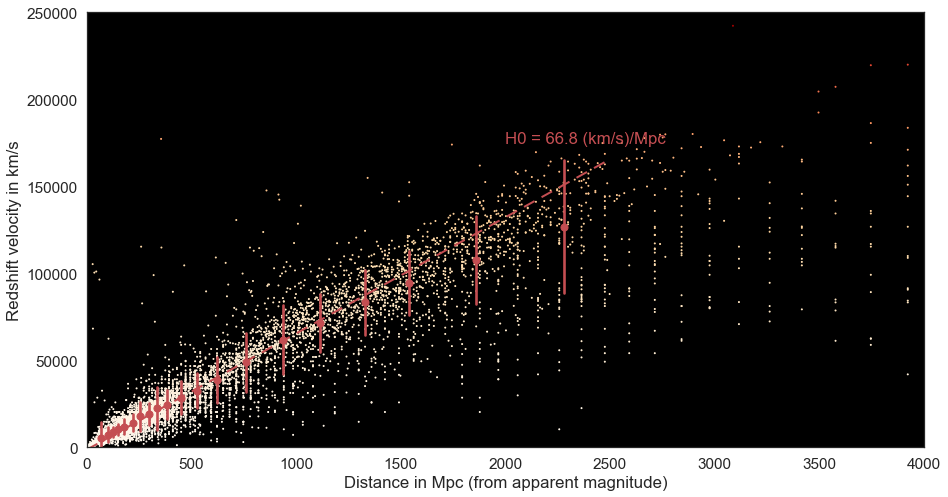

Hubble Constant : H0 = 66.8 (km/s)/Mpc


In [58]:
# Plotting redshift velocity measurements vs maximum apparent magnitude distance measurements
f, ax = plt.subplots(figsize=(15,8))
points = ax.scatter(SN_Ia_data["distance_maxappmag"]/10**6, SN_Ia_data["redshift_velocity"]/1000, c=SN_Ia_data["redshift"], s=1, cmap="OrRd")
sns.regplot(SN_Ia_data["distance_maxappmag"]/10**6, SN_Ia_data["redshift_velocity"]/1000, x_bins = 20, x_ci = "sd", fit_reg  = False, color = pal.as_hex()[2])
ax.set_xlim(0, 4000)
ax.set_ylim(0, 0.25e6)
ax.set_xlabel("Distance in Mpc (from apparent magnitude)")
ax.set_ylabel("Redshift velocity in km/s")
#f.colorbar(points)

# Robust linear fit with RANSAC algorithm
ransac = RANSACRegressor(min_samples = 2, random_state = 1)
SN_Ia_data_filtered = SN_Ia_data[SN_Ia_data["distance_maxappmag"]/10**6 < 2500][["distance_maxappmag", "redshift_velocity"]].dropna()
X = list(SN_Ia_data_filtered["distance_maxappmag"].values/10**6)
X_list = [[x] for x in X]
y = SN_Ia_data_filtered["redshift_velocity"]/1000
ransac.fit(X = X_list, y = y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(min(X), max(X))[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)
plt.plot(line_X, line_y_ransac, color = pal.as_hex()[2], linewidth=2,
         label='RANSAC regressor', dashes = (6,4))
H0 = (ransac.predict([[1]]) - ransac.predict([[0]]))[0]
plt.text(x = 2000, y = 175000, s = "H0 = %0.1f (km/s)/Mpc" % H0, color = pal.as_hex()[2])
ax.set_facecolor("black")
plt.show()

print("Hubble Constant : H0 = %0.1f (km/s)/Mpc" % H0)


In [40]:
# Calculation of the Age of the Universe
age_of_the_universe =  (1/H0) / 3.24078e-20 # Convertion factior from km to Mpc
age_of_the_universe_GYr = age_of_the_universe / (3600*24*365.25*10**9) # Convertion from seconds to billion years
print("Age of the Universe: %0.1f billion years" % age_of_the_universe_GYr)

Age of the Universe: 14.6 billion years


In [41]:
# Calculating lookback time of type Ia supernovae as a function of redshift
SN_Ia_data["lookback_time"] = 1/H0 * (1-1/(1+SN_Ia_data["redshift"])) / 3.24078e-20 / (3600*24*365.25*10**9)

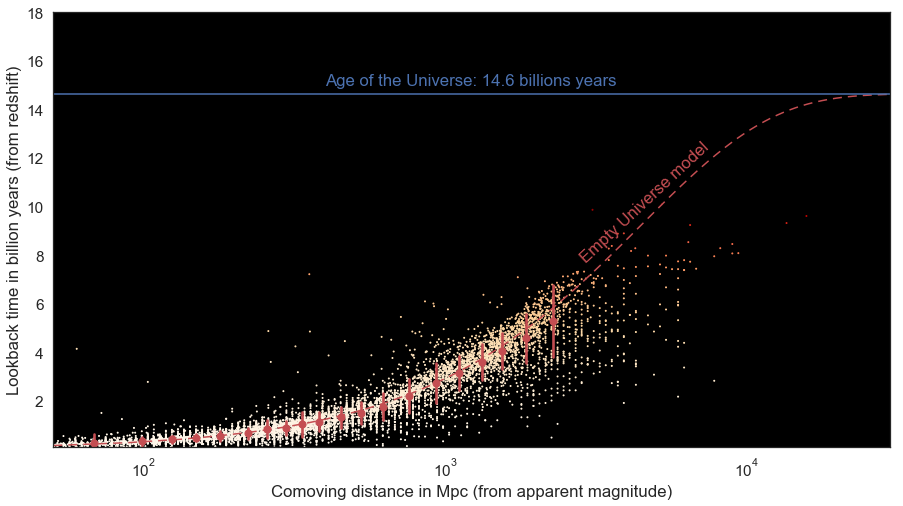

In [56]:
# Plotting lookback time as a function of distance
cmap = sns.cubehelix_palette(100, as_cmap=True)
cmap = sns.diverging_palette(9, 10, n=1, as_cmap=True)
sns.set_style("white")
f, ax = plt.subplots(figsize=(15,8))
points = ax.scatter(SN_Ia_data["distance_maxappmag"]/10**6, SN_Ia_data["lookback_time"], c=SN_Ia_data["redshift"], s=1, cmap="OrRd", label = "Type Ia Supernova")
sns.regplot(SN_Ia_data["distance_maxappmag"]/10**6, SN_Ia_data["lookback_time"], x_bins = 20, x_ci = "sd", fit_reg  = False, color = pal.as_hex()[2])
ax.set_xlim(50,30000)
ax.set_ylim(0.1,18)
ax.set_xscale(value="log")

# Adding empty universe model curve and estimated Age of the Universe
expected_lookback = []
expected_distance = []
list_x = []
for z in range(0,100000):
    t_from_z = 1/H0 * (1-1/(1+z/100)) / 3.24078e-20 / (3600*24*365.25*10**9)
    d_from_z = constants.speed_of_light/H0* math.log(1+z/100)*1000/10**6
    list_x.append(z)
    expected_lookback.append(t_from_z)
    expected_distance.append(d_from_z)
ax.plot(expected_distance , expected_lookback, dashes = (6,4), color = pal.as_hex()[2])
ax.axhline(age_of_the_universe_GYr, color = pal.as_hex()[0])

ax.set_facecolor("black")
ax.text(400, 15, s = "Age of the Universe: %0.1f billions years" % age_of_the_universe_GYr, color = pal.as_hex()[0])
ax.text(2750, 12.3, s = "Empty Universe model" , color = pal.as_hex()[2], rotation=43)
ax.set_xlabel("Comoving distance in Mpc (from apparent magnitude)")
ax.set_ylabel("Lookback time in billion years (from redshift)")
plt.show()